#optimization problem 
https://en.wikipedia.org/wiki/Optimization_problem

>$$
\begin{aligned}&{\underset {x}{\operatorname {minimize} }}&&f(x)\\&\operatorname {subject\;to} &&g_{i}(x)\leq 0,\quad i=1,\dots ,m\\&&&h_{j}(x)=0,\quad j=1,\dots ,p\end{aligned}
$$
>where :

> * $ f:\mathbb {R} ^{n}\to \mathbb {R}  $  is the objective function to be minimized over the n-variable vector $ {\displaystyle x},$<br>
> * $g_{i}(x)\leq 0 $are called inequality constraints<br>
> * ${\displaystyle h_{j}(x)=0}$ are called equality constraints, and ${\displaystyle m\geq 0\ and\ p\geq 0}.$<br><br>

>If ${\displaystyle m}$ and ${\displaystyle p}$ equal 0, the problem is an unconstrained optimization problem. 
By convention, the standard form defines a minimization problem. A maximization problem can be treated by negating the objective function.

 

#1.Define the optimization problem by Mathematic equations.

#2. one variable  method: using constraint to replace one variable 

#2.1 run tensorflow gradient descent to answer the question.

#2.2 run genetic algorithm answer the question.


We have a piece of cardboard that is 14 inches by 10 inches and we’re going to cut out the corners as shown below and fold up the sides to form a box, also shown below. Determine the height of the box that will give a maximum volume.

>![img](http://tutorial.math.lamar.edu/Classes/CalcI/Optimization_Files/image006.gif)

>Let’s let the height of the box be $h$ . So, the width/length of the corners being cut out is also h and so the vertical side will have a “new” height of $10−2h$ and the horizontal side will have a “new” width of $14−2h$. 

>![img](http://tutorial.math.lamar.edu/Classes/CalcI/Optimization_Files/image007.png)

>In this example, for the first time, we’ve run into a problem where the constraint doesn’t really have an equation. The constraint is simply the size of the piece of cardboard and has already been factored into the figure above. This will happen on occasion and so don’t get excited about it when it does. This just means that we have one less equation to worry about. In this case we want to maximize the volume. Here is the volume, in terms of $h$ and its first derivative.
>>$V(h)=h(14−2h)(10−2h)=140h−48h^2+4h^3 $<br>

>Setting the first derivative equal to zero and solving gives the following two critical points,

>>$h = \frac{{12 \pm \sqrt {39} }}{3} = 1.9183,\,\,\,\,6.0817$

>We now have an apparent problem. We have two critical points and we’ll need to determine which one is the value we need. The fact that we have two critical points means that neither the first derivative test or the second derivative test can be used here as they both require a single critical point. This isn’t a real problem however. Go back to the figure at the start of the solution and notice that we can quite easily find limits on h. The smallest h can be is h=0 even though this doesn’t make much sense as we won’t get a box in this case. Also, from the 10 inch side we can see that the largest h can be is $h=5$ although again, this doesn’t make much sense physically.

>So, knowing that whatever $h$ is it must be in the range $0≤h≤5$  we can see that the second critical point is outside this range and so the only critical point that we need to worry about is 1.9183.

>Finally, since the volume is defined and continuous on $0≤h≤5$ all we need to do is plug in the critical points and endpoints into the volume to determine which gives the largest volume. Here are those function evaluations.
>>$
V\left( 0 \right) = 0\hspace{0.25in}\hspace{0.25in}V\left( {1.9183} \right) = 120.1644\hspace{0.25in}\hspace{0.25in}V\left( 5 \right) = 0
$

>So, if we take $h=1.9183$ we get a maximum volume.


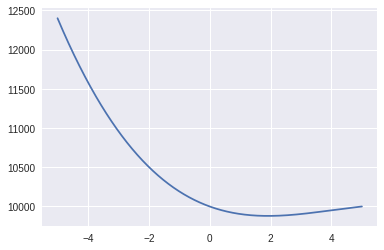

In [32]:

import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

def func_q(h):
  return 140*h-48*h**2+4*h**3


x = np.linspace(-5, 5, 1000)
y = 10000-func_q(x_data)

pylab.plot(x, y,)



In [36]:

h = tf.Variable(tf.random_uniform([1], -10, 10.0))


func_tf = 1000000-func_q(h)

loss = func_tf 
optimizer = tf.train.GradientDescentOptimizer(0.01) 
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()

print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)
#print(init)

# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)

#print(sess.run([h]))


for step in range(87):
    sess.run(train)
print(sess.run([h]))


loss: Tensor("sub_11:0", shape=(1,), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fbb55fd2438>
train: name: "GradientDescent_5"
op: "NoOp"
input: "^GradientDescent_5/update_Variable_5/ApplyGradientDescent"

[array([1.918334], dtype=float32)]


In [34]:
!pip install gaft

In [35]:
from math import sin, cos, pi

from gaft import GAEngine
from gaft.components import BinaryIndividual
from gaft.components import Population
from gaft.operators import TournamentSelection
from gaft.operators import UniformCrossover
from gaft.operators import FlipBitBigMutation

# Built-in best fitness analysis.
from gaft.analysis.fitness_store import FitnessStore
from gaft.analysis.console_output import ConsoleOutput


indv_template = BinaryIndividual(ranges=[(-5, 5)], eps=0.001)
population = Population(indv_template=indv_template, size=50).init()

selection = TournamentSelection()
crossover = UniformCrossover(pc=0.8, pe=0.5)
mutation = FlipBitBigMutation(pm=0.1, pbm=0.55, alpha=0.6)

engine = GAEngine(population=population, selection=selection,
                  crossover=crossover, mutation=mutation,
                  analysis=[ConsoleOutput, FitnessStore])

# Define fitness function.
@engine.fitness_register
def fitness(indv):
    h, = indv.solution
    return 140*h-48*h**2+4*h**3

if '__main__' == __name__:

  engine.run(ng=87)



gaft.ConsoleOutput   INFO     Generation number: 87 Population number: 50
gaft.ConsoleOutput   INFO     Generation: 1, best fitness: 120.164, scaled fitness: 120.164
gaft.ConsoleOutput   INFO     Generation: 2, best fitness: 120.164, scaled fitness: 120.164
gaft.ConsoleOutput   INFO     Generation: 3, best fitness: 120.164, scaled fitness: 120.164
gaft.ConsoleOutput   INFO     Generation: 4, best fitness: 120.164, scaled fitness: 120.164
gaft.ConsoleOutput   INFO     Generation: 5, best fitness: 120.164, scaled fitness: 120.164
gaft.ConsoleOutput   INFO     Generation: 6, best fitness: 120.164, scaled fitness: 120.164
gaft.ConsoleOutput   INFO     Generation: 7, best fitness: 120.164, scaled fitness: 120.164
gaft.ConsoleOutput   INFO     Generation: 8, best fitness: 120.164, scaled fitness: 120.164
gaft.ConsoleOutput   INFO     Generation: 9, best fitness: 120.164, scaled fitness: 120.164
gaft.ConsoleOutput   INFO     Generation: 10, best fitness: 120.164, scaled fitness: 120.164
gaft.